# Exploratory Data Analysis on Medical Appointment No-Shows

This Jupyter Notebook is designed to conduct an exploratory data analysis (EDA) on the medical appointment no-shows dataset. The goal is to uncover insights into the factors that influence whether patients miss their scheduled medical appointments.

### Importing Necessary Libraries

In [1151]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Overview of the Data

In [1152]:
# Reading the dataset

primary_data = pd.read_csv('D:\Portfolio\Python EDA\Healthcare_Data.csv')

In [1153]:
primary_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [1154]:
primary_data.shape

(110527, 14)

In [1155]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [1156]:
# Count total null values in each column
null_values = primary_data.isnull().sum()

# Display the count of null values for each column
print(null_values)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Manipulation for Analysis

In [1157]:
# Check for duplicates
duplicates = primary_data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    primary_data.drop_duplicates(inplace=True)

# Count the records with negative ages
negative_ages_count = (primary_data['Age'] < 0).sum()
print(f"Count of records with negative ages: {negative_ages_count}")


Number of duplicate records: 0
Count of records with negative ages: 1


In [1158]:
# Step 1: Identify the record with a negative age
record_to_impute = primary_data[primary_data['Age'] < 0]

# Assuming there's only one such record, if there's more, you might need to loop through or apply a more complex logic
if not record_to_impute.empty:
    # Step 2: Filter the dataset to exclude the record with the negative age
    valid_records = primary_data[primary_data['Age'] >= 0]
    
    # Extracting the conditions of the record to impute
    conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Scholarship']
    filter_conditions = {cond: record_to_impute.iloc[0][cond] for cond in conditions}
    
    # Step 3: Find similar records
    similar_records = valid_records[(valid_records[list(filter_conditions)] == pd.Series(filter_conditions)).all(axis=1)]
    
    # Calculate the median age of similar records
    median_age = similar_records['Age'].median()
    
    # Step 4: Impute the age of the record with the negative age with the median age of similar records
    primary_data.loc[primary_data['Age'] < 0, 'Age'] = median_age

    print(f"Imputed age with: {median_age}")
else:
    print("No records with negative age found.")



Imputed age with: 29.0


In [1159]:
# Count the records with negative ages after imputation
negative_ages_count_after = (primary_data['Age'] < 0).sum()

# Print the count of records with negative ages after the imputation
print(f"Count of records with negative ages after imputation: {negative_ages_count_after}")


Count of records with negative ages after imputation: 0


In [1160]:
#Converting the schedule and appointement day into standard datetime form
primary_data['ScheduledDay'] = pd.to_datetime(primary_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
primary_data['AppointmentDay'] = pd.to_datetime(primary_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [1161]:
primary_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1162]:
# Creating a new column to store day of the week data for the Scheduled and Appointement dates, dayofweek assigns days (Mon to Sun = 0 to 6) according to the dates 

primary_data['sch_weekday'] = primary_data['ScheduledDay'].dt.dayofweek

In [1163]:
primary_data['app_weekday'] = primary_data['AppointmentDay'].dt.dayofweek

In [1164]:
# Create month and year columns for both ScheduledDay and AppointmentDay
primary_data['ScheduledMonth'] = primary_data['ScheduledDay'].dt.month_name()
primary_data['AppointmentMonth'] = primary_data['AppointmentDay'].dt.month_name()


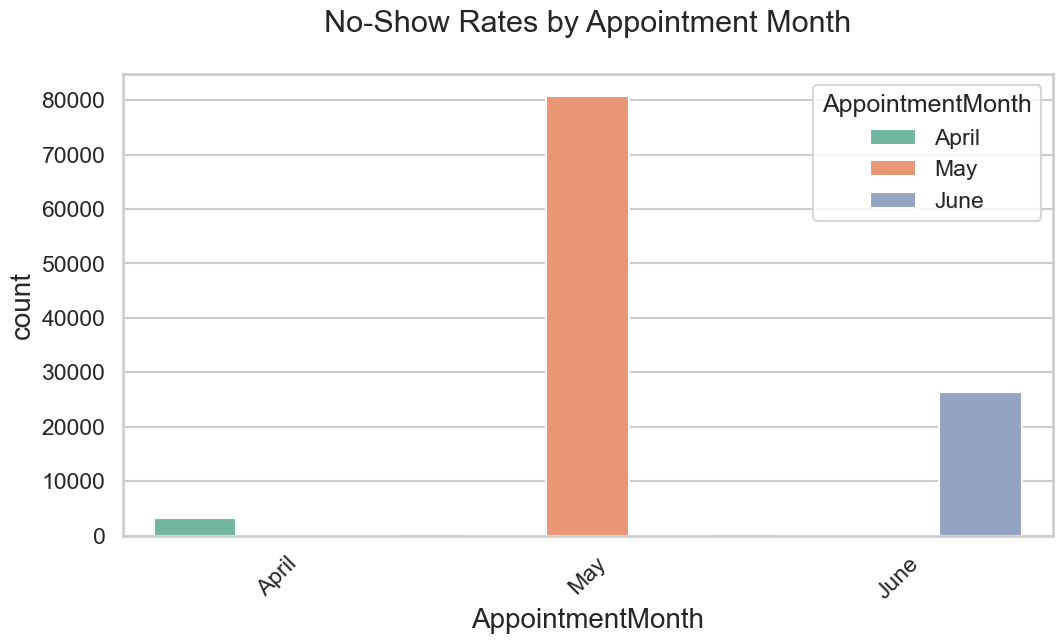

In [1165]:
# Visualize No-Show Rates by Appointment Month
plt.figure(figsize=(12, 6))
sns.countplot(x='AppointmentMonth', hue='AppointmentMonth', data=primary_data, palette='Set2')
plt.title('No-Show Rates by Appointment Month')
plt.xticks(rotation=45)
plt.show()

In [1166]:
primary_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday', 'ScheduledMonth', 'AppointmentMonth'],
      dtype='object')

In [1167]:
#Name Correction of columns headers
primary_data= primary_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [1168]:
primary_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday', 'ScheduledMonth', 'AppointmentMonth'],
      dtype='object')

In [1169]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PatientId         110527 non-null  float64       
 1   AppointmentID     110527 non-null  int64         
 2   Gender            110527 non-null  object        
 3   ScheduledDay      110527 non-null  datetime64[ns]
 4   AppointmentDay    110527 non-null  datetime64[ns]
 5   Age               110527 non-null  int64         
 6   Neighbourhood     110527 non-null  object        
 7   Scholarship       110527 non-null  int64         
 8   Hypertension      110527 non-null  int64         
 9   Diabetes          110527 non-null  int64         
 10  Alcoholism        110527 non-null  int64         
 11  Handicap          110527 non-null  int64         
 12  SMSReceived       110527 non-null  int64         
 13  NoShow            110527 non-null  object        
 14  sch_

In [1170]:
#Dropping irrelevant columns
primary_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [1171]:
primary_data.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,ScheduledMonth,AppointmentMonth
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4,April,April
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4,April,April
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4,April,April
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4,April,April
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4,April,April
5,F,2016-04-27,2016-04-29,76,0,1,0,0,0,0,No,2,4,April,April
6,F,2016-04-27,2016-04-29,23,0,0,0,0,0,0,Yes,2,4,April,April
7,F,2016-04-27,2016-04-29,39,0,0,0,0,0,0,Yes,2,4,April,April
8,F,2016-04-29,2016-04-29,21,0,0,0,0,0,0,No,4,4,April,April
9,F,2016-04-27,2016-04-29,19,0,0,0,0,0,0,No,2,4,April,April


In [1172]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Gender            110527 non-null  object        
 1   ScheduledDay      110527 non-null  datetime64[ns]
 2   AppointmentDay    110527 non-null  datetime64[ns]
 3   Age               110527 non-null  int64         
 4   Scholarship       110527 non-null  int64         
 5   Hypertension      110527 non-null  int64         
 6   Diabetes          110527 non-null  int64         
 7   Alcoholism        110527 non-null  int64         
 8   Handicap          110527 non-null  int64         
 9   SMSReceived       110527 non-null  int64         
 10  NoShow            110527 non-null  object        
 11  sch_weekday       110527 non-null  int32         
 12  app_weekday       110527 non-null  int32         
 13  ScheduledMonth    110527 non-null  object        
 14  Appo

In [1173]:
primary_data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.089146,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.109934,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


### Our target variable is *No-Show* patients to the hospital

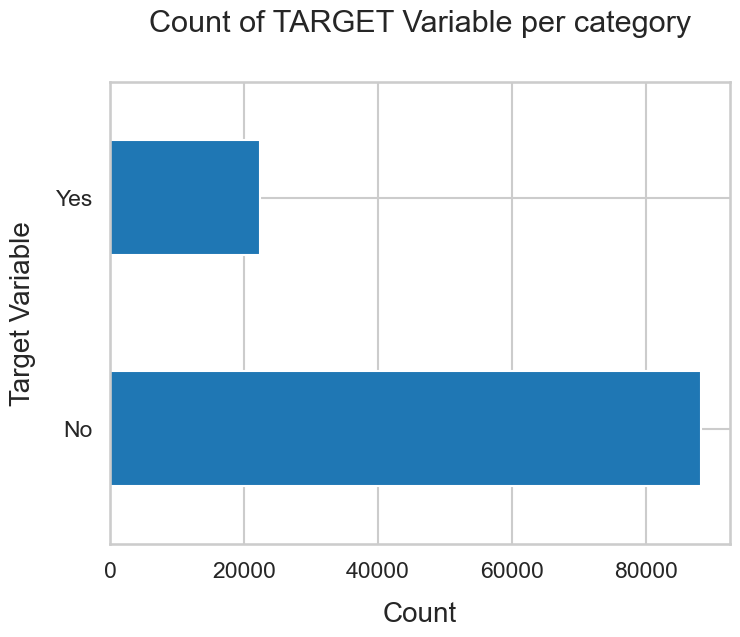

In [1174]:
primary_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [1175]:
#Calculating percentage of No-Shows to appointments
100*primary_data['NoShow'].value_counts()/len(primary_data['NoShow'])

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [1176]:
#Count of total patients in each category
primary_data['NoShow'].value_counts()

NoShow
No     88208
Yes    22319
Name: count, dtype: int64

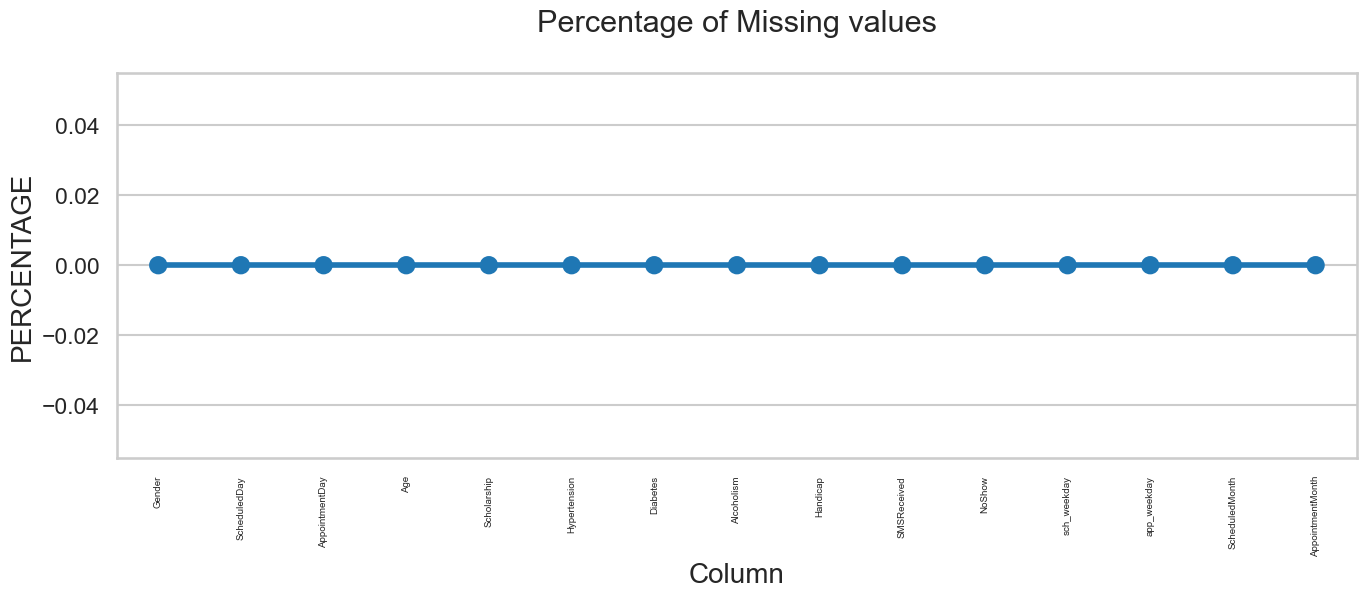

In [1177]:
# Having a look that data contains missing values or not
missing = pd.DataFrame(primary_data.isnull().sum() * 100 / primary_data.shape[0], columns=['Percentage']).reset_index()
missing.rename(columns={'index': 'Column', 'Percentage': 'Percentage'}, inplace=True)

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Here we can see that we do not have any missing/null values in our data

#### General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

In [1178]:
# Creating a backup of original cleaned data before manipulation and analysis
backup_data = primary_data.copy()

In [1179]:
backup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Gender            110527 non-null  object        
 1   ScheduledDay      110527 non-null  datetime64[ns]
 2   AppointmentDay    110527 non-null  datetime64[ns]
 3   Age               110527 non-null  int64         
 4   Scholarship       110527 non-null  int64         
 5   Hypertension      110527 non-null  int64         
 6   Diabetes          110527 non-null  int64         
 7   Alcoholism        110527 non-null  int64         
 8   Handicap          110527 non-null  int64         
 9   SMSReceived       110527 non-null  int64         
 10  NoShow            110527 non-null  object        
 11  sch_weekday       110527 non-null  int32         
 12  app_weekday       110527 non-null  int32         
 13  ScheduledMonth    110527 non-null  object        
 14  Appo

In [1180]:
list(primary_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'ScheduledMonth',
 'AppointmentMonth']

### Demographic Analysis

C:\Users\K Majeti\AppData\Local\Temp\ipykernel_8632\3175594227.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(primary_data['Age'], shade=True, color="r", alpha=0.8)
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


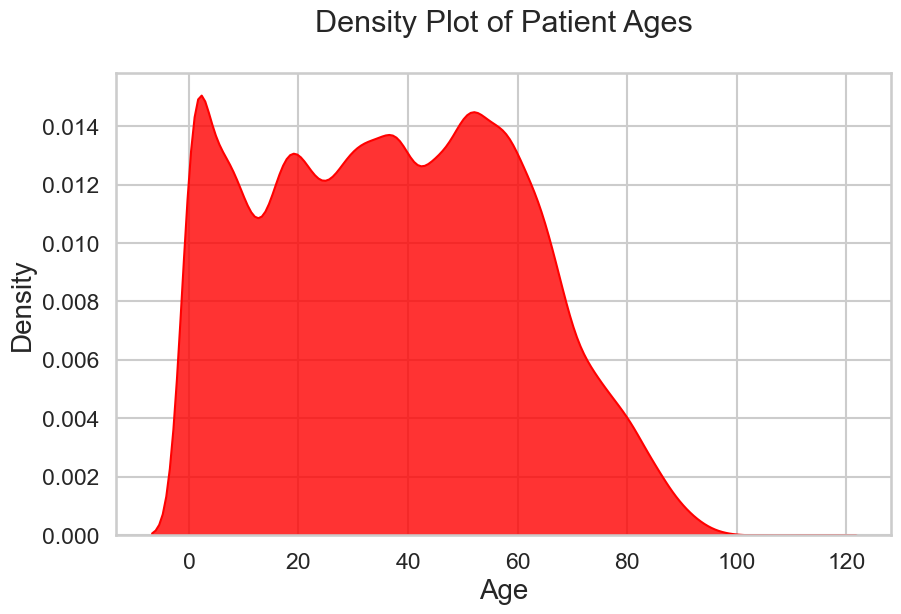

In [1181]:
# KDE Plot for Age Distribution
# Suggestion: Place this after initial exploration of age-related statistics or in the demographics section.
plt.figure(figsize=(10, 6))
sns.kdeplot(primary_data['Age'], shade=True, color="r", alpha=0.8)
plt.title('Density Plot of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
# Insight: This visualization provides a smooth estimate of how patient ages are distributed across the dataset.


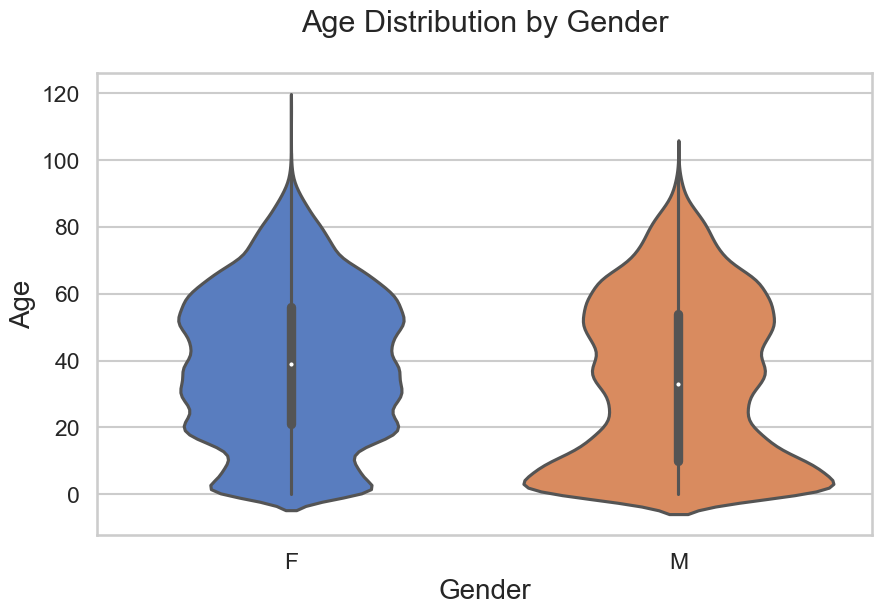

In [1182]:
# Violin Plot for Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=primary_data, palette='muted')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()



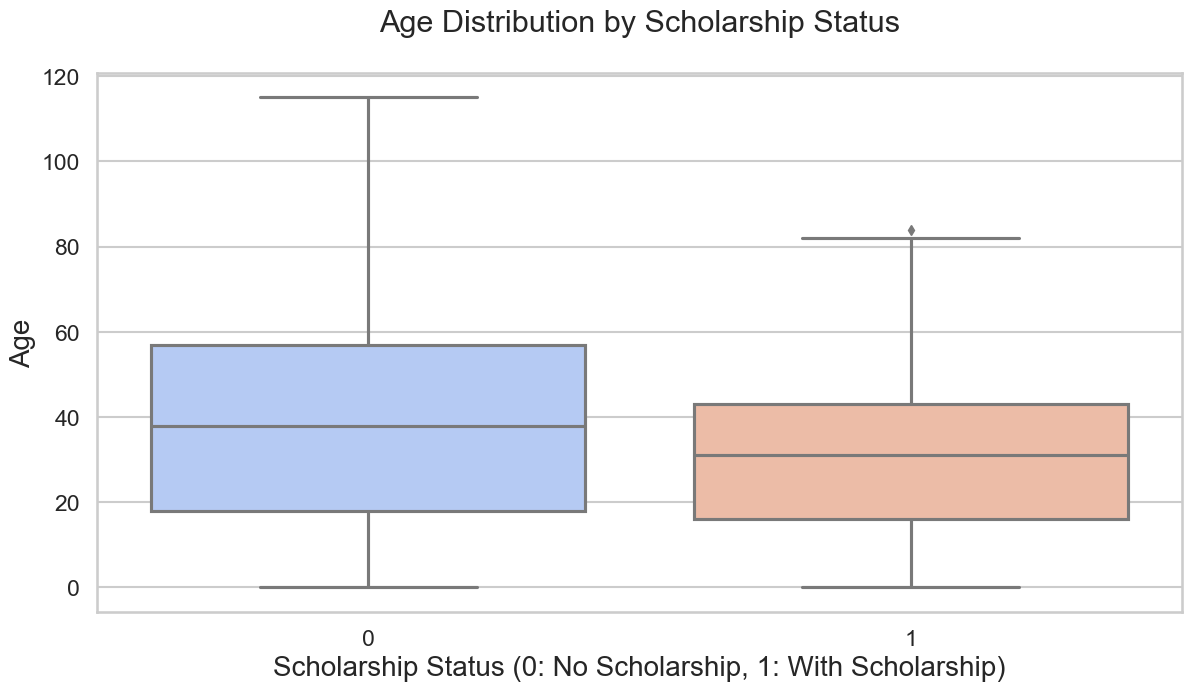

In [1183]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Scholarship', y='Age', data=primary_data, palette='coolwarm')
plt.title('Age Distribution by Scholarship Status')
plt.xlabel('Scholarship Status (0: No Scholarship, 1: With Scholarship)')
plt.ylabel('Age')
plt.show()


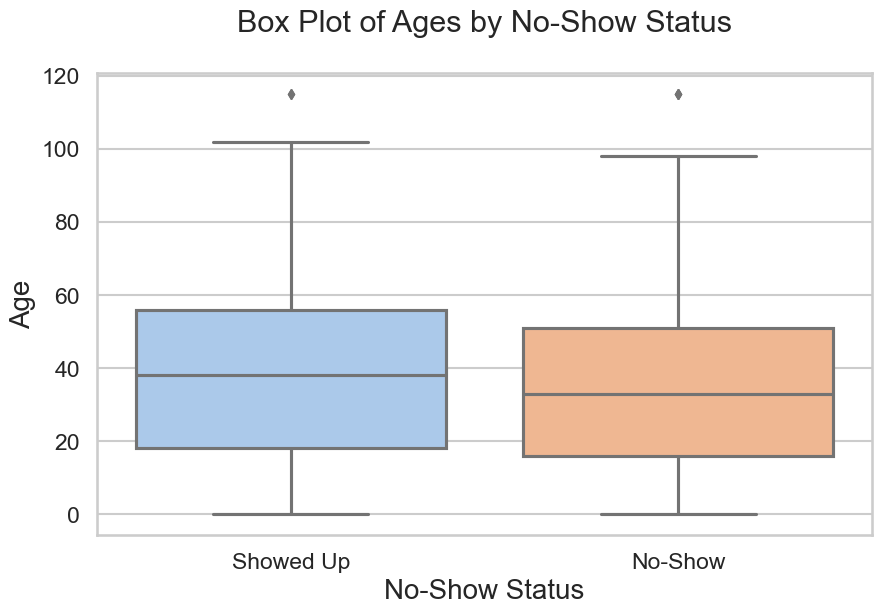

In [1184]:
# Correct way to specify the 'x' and 'y' parameters
plt.figure(figsize=(10, 6))
sns.boxplot(x='NoShow', y='Age', data=primary_data, palette='pastel')
plt.title('Box Plot of Ages by No-Show Status')
plt.xlabel('No-Show Status')
plt.ylabel('Age')
# Depending on how 'NoShow' is coded, adjust the labels accordingly
plt.xticks(ticks=[0, 1], labels=['Showed Up', 'No-Show']) 
plt.show()


In [1185]:
# Categorize age into bins
primary_data['AgeCategory'] = pd.cut(primary_data['Age'], bins=[0, 18, 35, 55, 75, 100], labels=['0-18', '19-35', '36-55', '56-75', '76-100'])


d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d

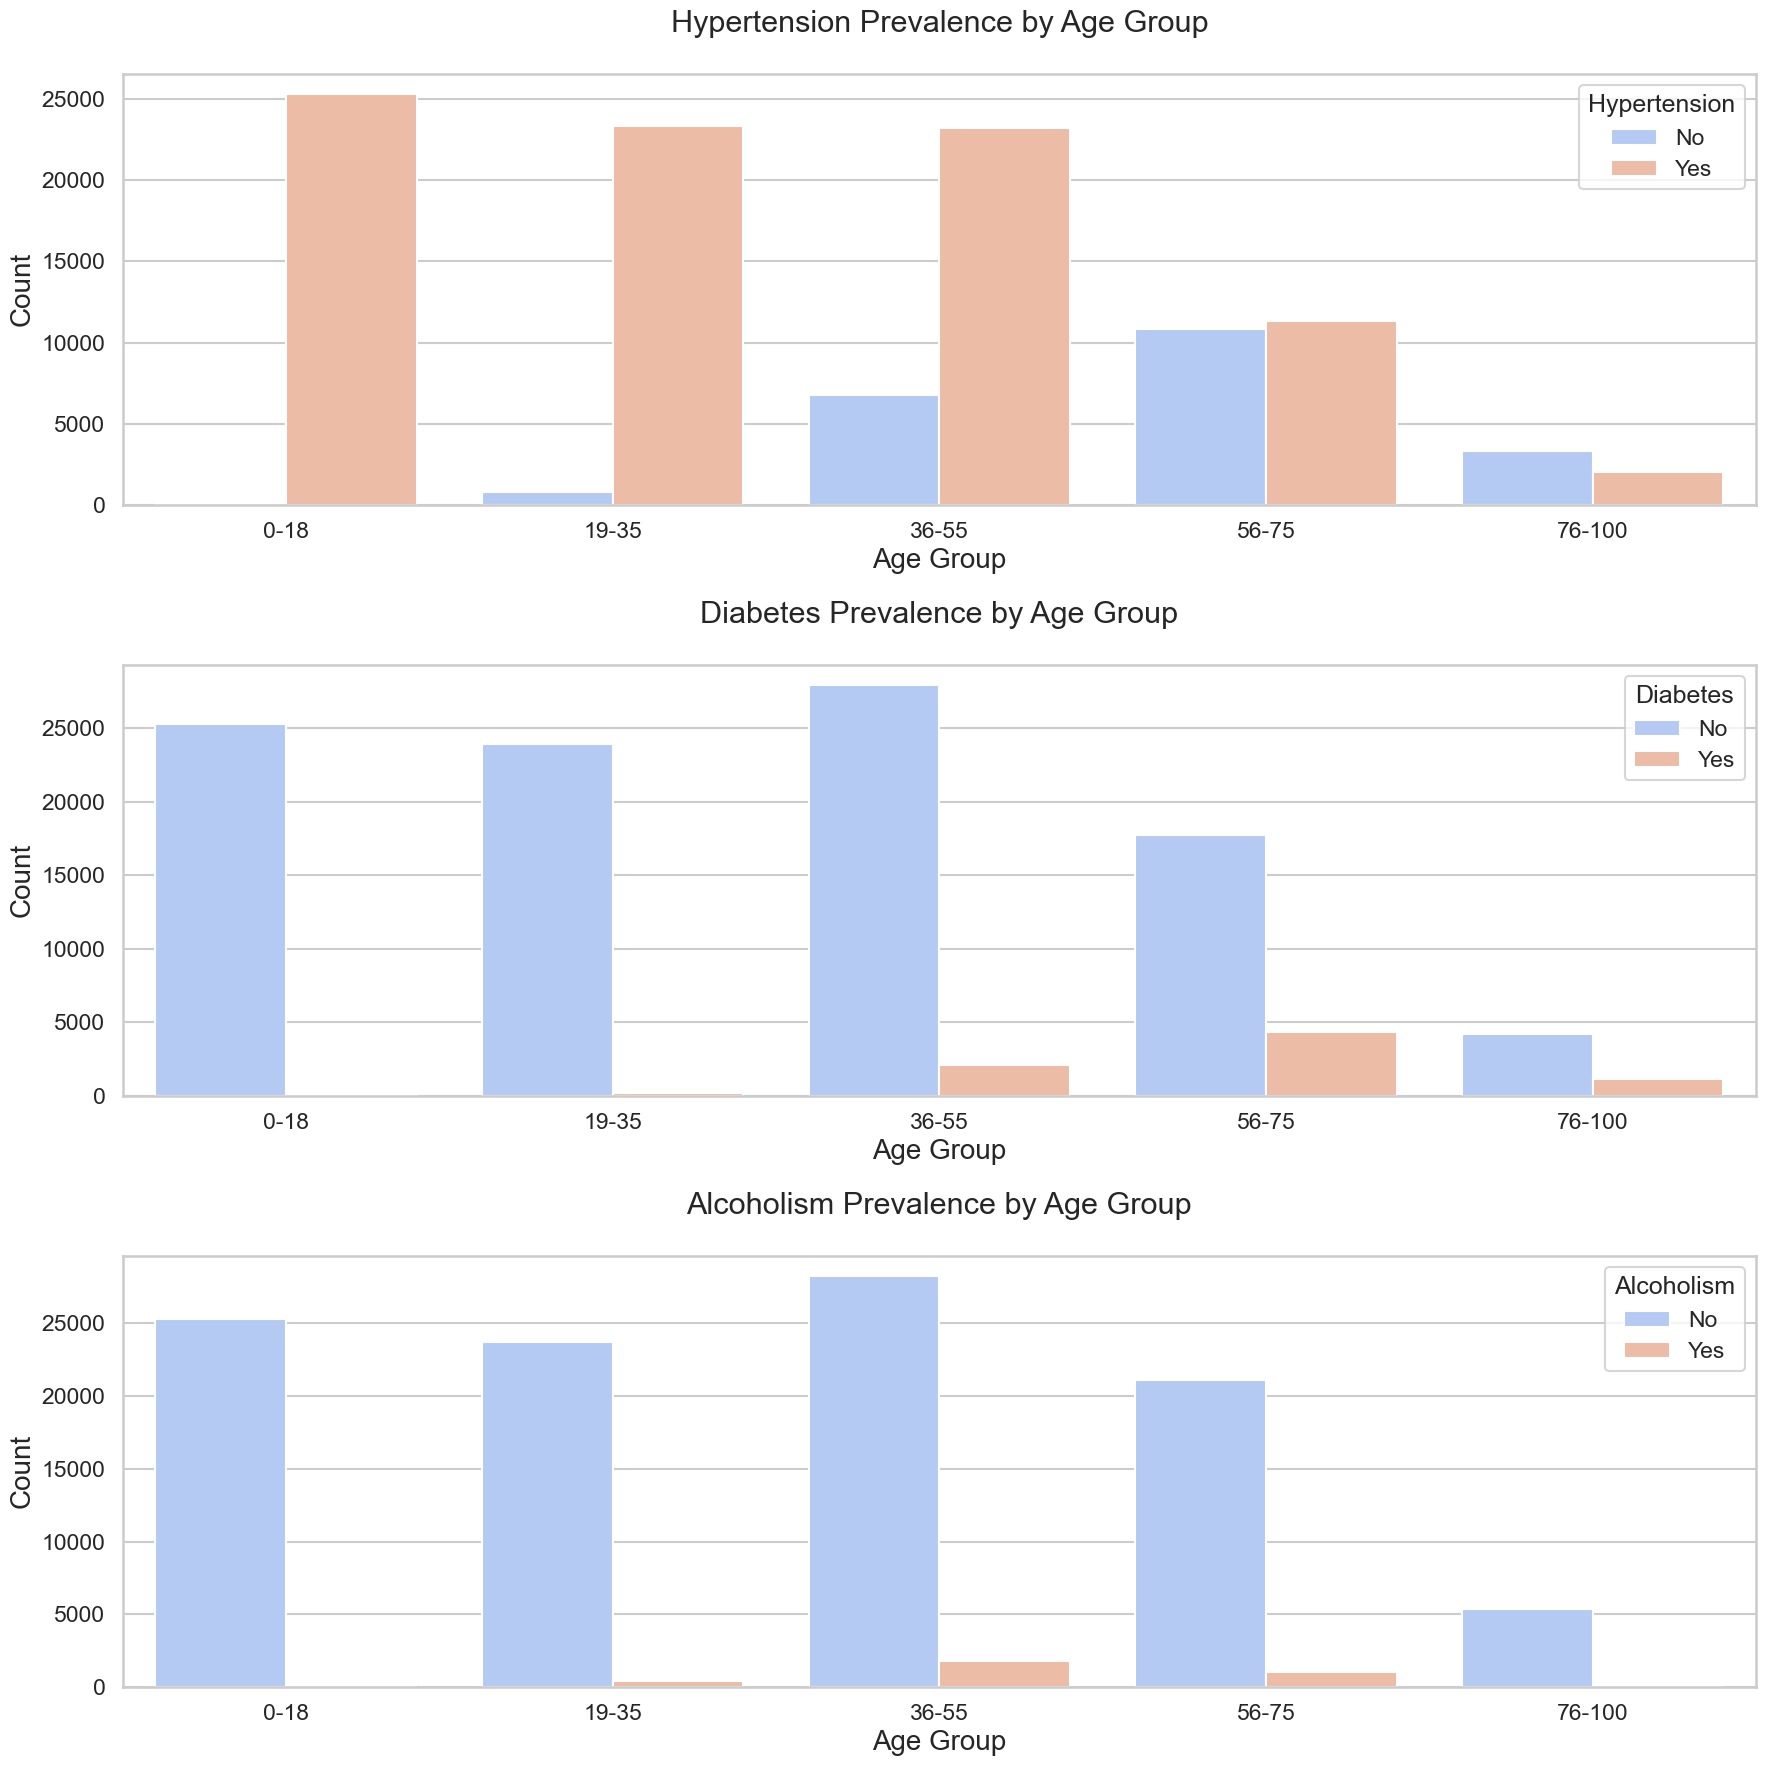

In [1186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the conditions are stored in this format in your DataFrame
conditions = ['Hypertension', 'Diabetes', 'Alcoholism']

# Setup the matplotlib figure
plt.figure(figsize=(18, 6 * len(conditions)))

for i, condition in enumerate(conditions, 1):
    # Convert the current condition column to string type for plotting
    primary_data[condition] = primary_data[condition].astype(str)
    
    plt.subplot(len(conditions), 1, i)
    sns.countplot(data=primary_data, x='AgeCategory', hue=condition, palette='coolwarm')
    plt.title(f'{condition} Prevalence by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    # Ensure the legend accurately reflects the data
    plt.legend(title=condition, labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


### Categorical Analysis

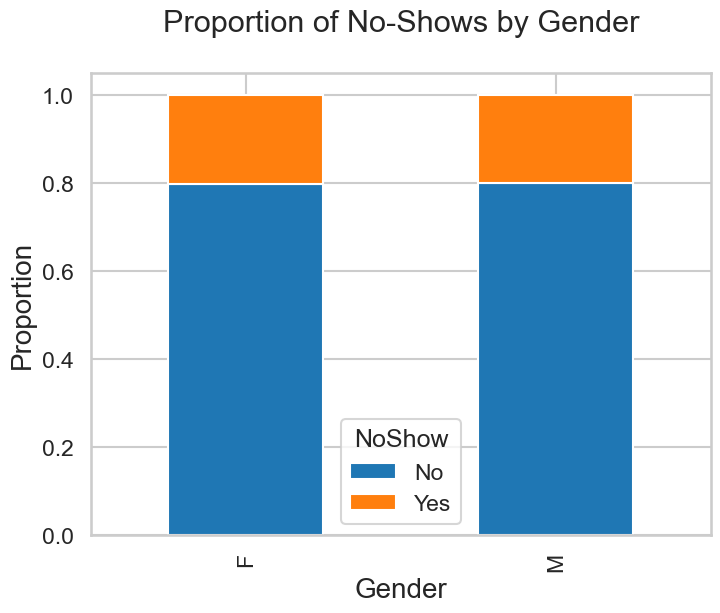

In [1187]:
#Proportion of No-Shows by Gender
gender_counts = primary_data.groupby('Gender')['NoShow'].value_counts(normalize=True).unstack()
gender_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportion of No-Shows by Gender')
plt.ylabel('Proportion')
plt.show()


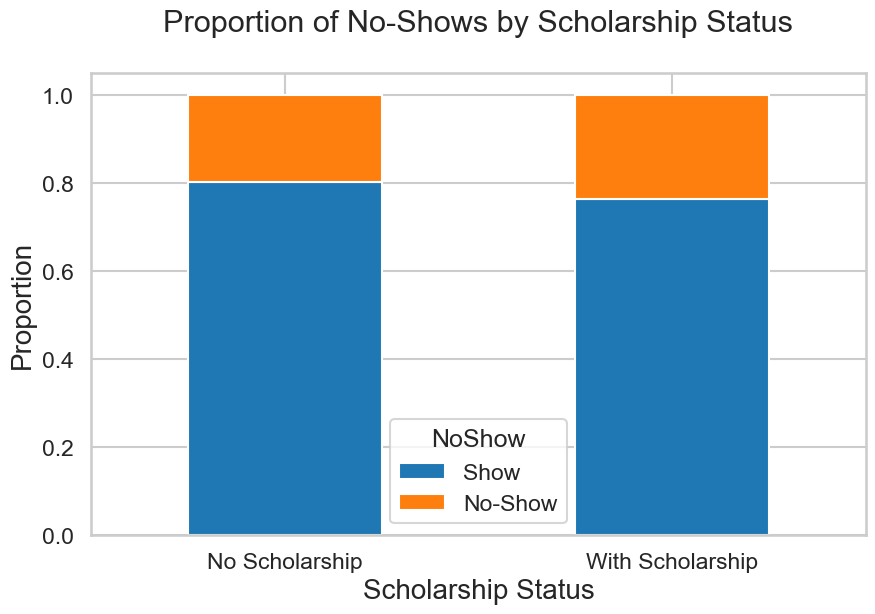

In [1188]:
scholarship_proportions = primary_data.groupby('Scholarship')['NoShow'].value_counts(normalize=True).unstack()
scholarship_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of No-Shows by Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Scholarship', 'With Scholarship'], rotation=0)
plt.legend(title='NoShow', labels=['Show', 'No-Show'])
plt.show()


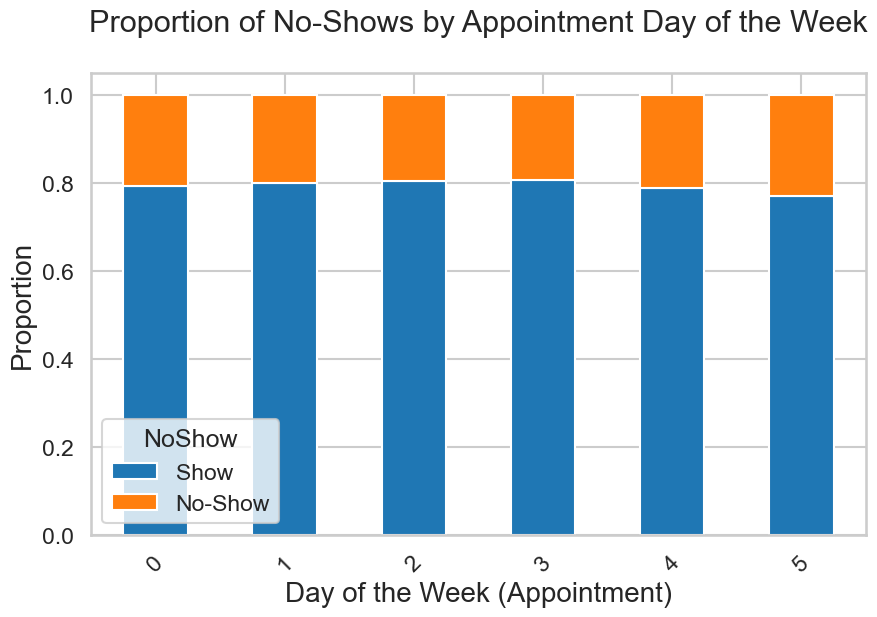

In [1189]:
app_day_proportions = primary_data.groupby('app_weekday')['NoShow'].value_counts(normalize=True).unstack()
app_day_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of No-Shows by Appointment Day of the Week')
plt.xlabel('Day of the Week (Appointment)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='NoShow', labels=['Show', 'No-Show'])
plt.show()


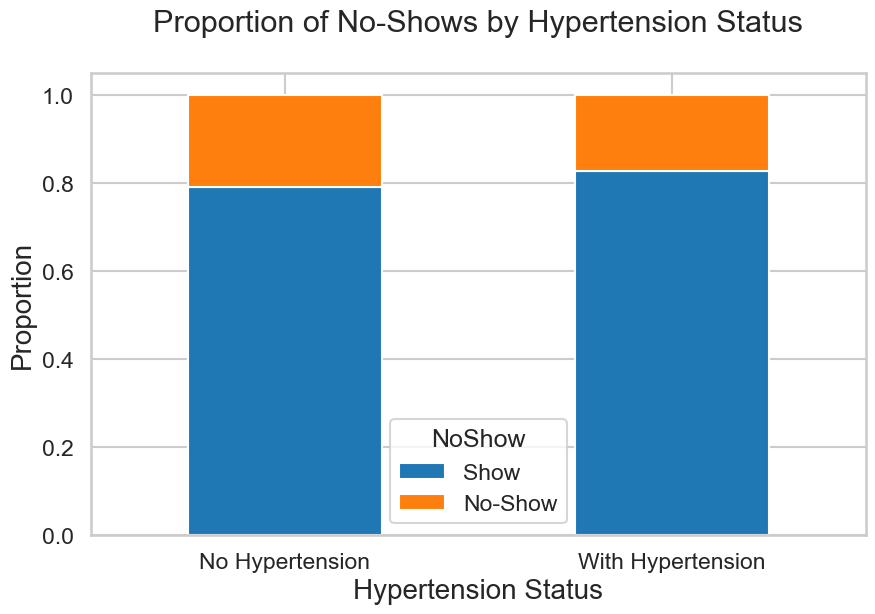

In [1190]:
hypertension_proportions = primary_data.groupby('Hypertension')['NoShow'].value_counts(normalize=True).unstack()
hypertension_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of No-Shows by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'With Hypertension'], rotation=0)
plt.legend(title='NoShow', labels=['Show', 'No-Show'])
plt.show()


### Numerical Analysis

##### Converting all the categorical variables into dummy variables
We can use label encoding only on dependent/target variables, we use one-hot encoding to cobert independent/categorical variables

In [1191]:
# Converting and showing target variable *NoShow* data into 0 & 1 
primary_data['NoShow'] = np.where(primary_data.NoShow == 'Yes',1,0)

In [1192]:
primary_data.NoShow.value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64

In [1193]:
base_data_dummies = pd.get_dummies(primary_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,...,ScheduledMonth_May,ScheduledMonth_November,AppointmentMonth_April,AppointmentMonth_June,AppointmentMonth_May,AgeCategory_0-18,AgeCategory_19-35,AgeCategory_36-55,AgeCategory_56-75,AgeCategory_76-100
0,2016-04-29,2016-04-29,62,0,0,0,0,4,4,True,...,False,False,True,False,False,False,False,False,True,False
1,2016-04-29,2016-04-29,56,0,0,0,0,4,4,False,...,False,False,True,False,False,False,False,False,True,False
2,2016-04-29,2016-04-29,62,0,0,0,0,4,4,True,...,False,False,True,False,False,False,False,False,True,False
3,2016-04-29,2016-04-29,8,0,0,0,0,4,4,True,...,False,False,True,False,False,True,False,False,False,False
4,2016-04-29,2016-04-29,56,0,0,0,0,4,4,True,...,False,False,True,False,False,False,False,False,True,False


<Axes: >

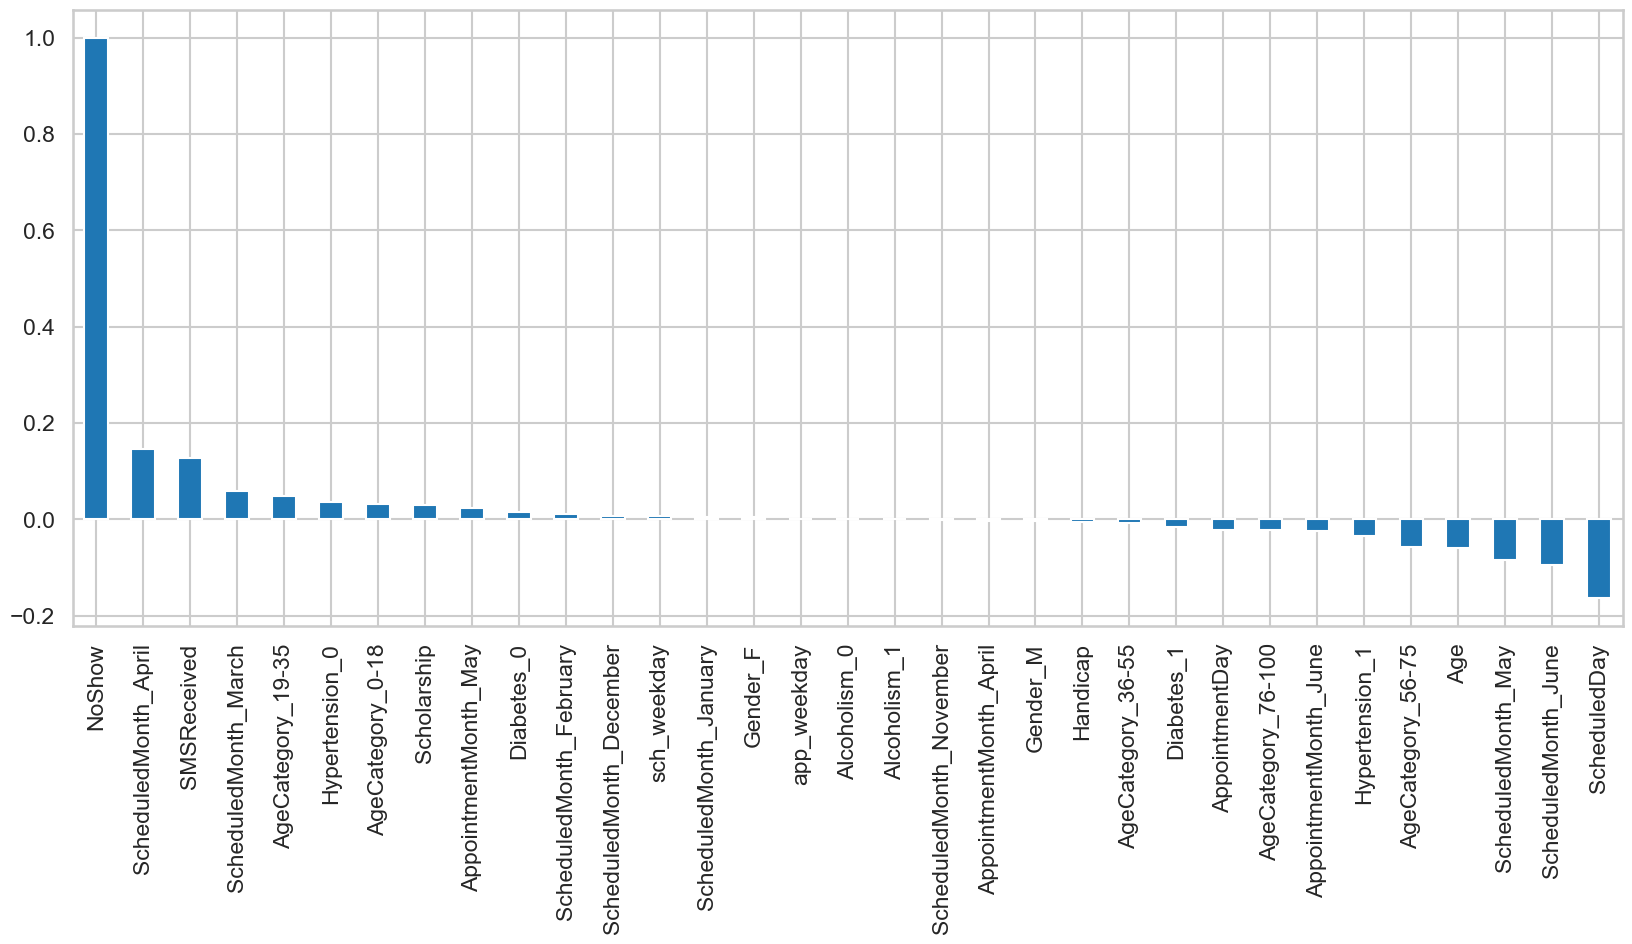

In [1194]:
# Analyzing predictors correlation in respect to the Target/NoShow Variable
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

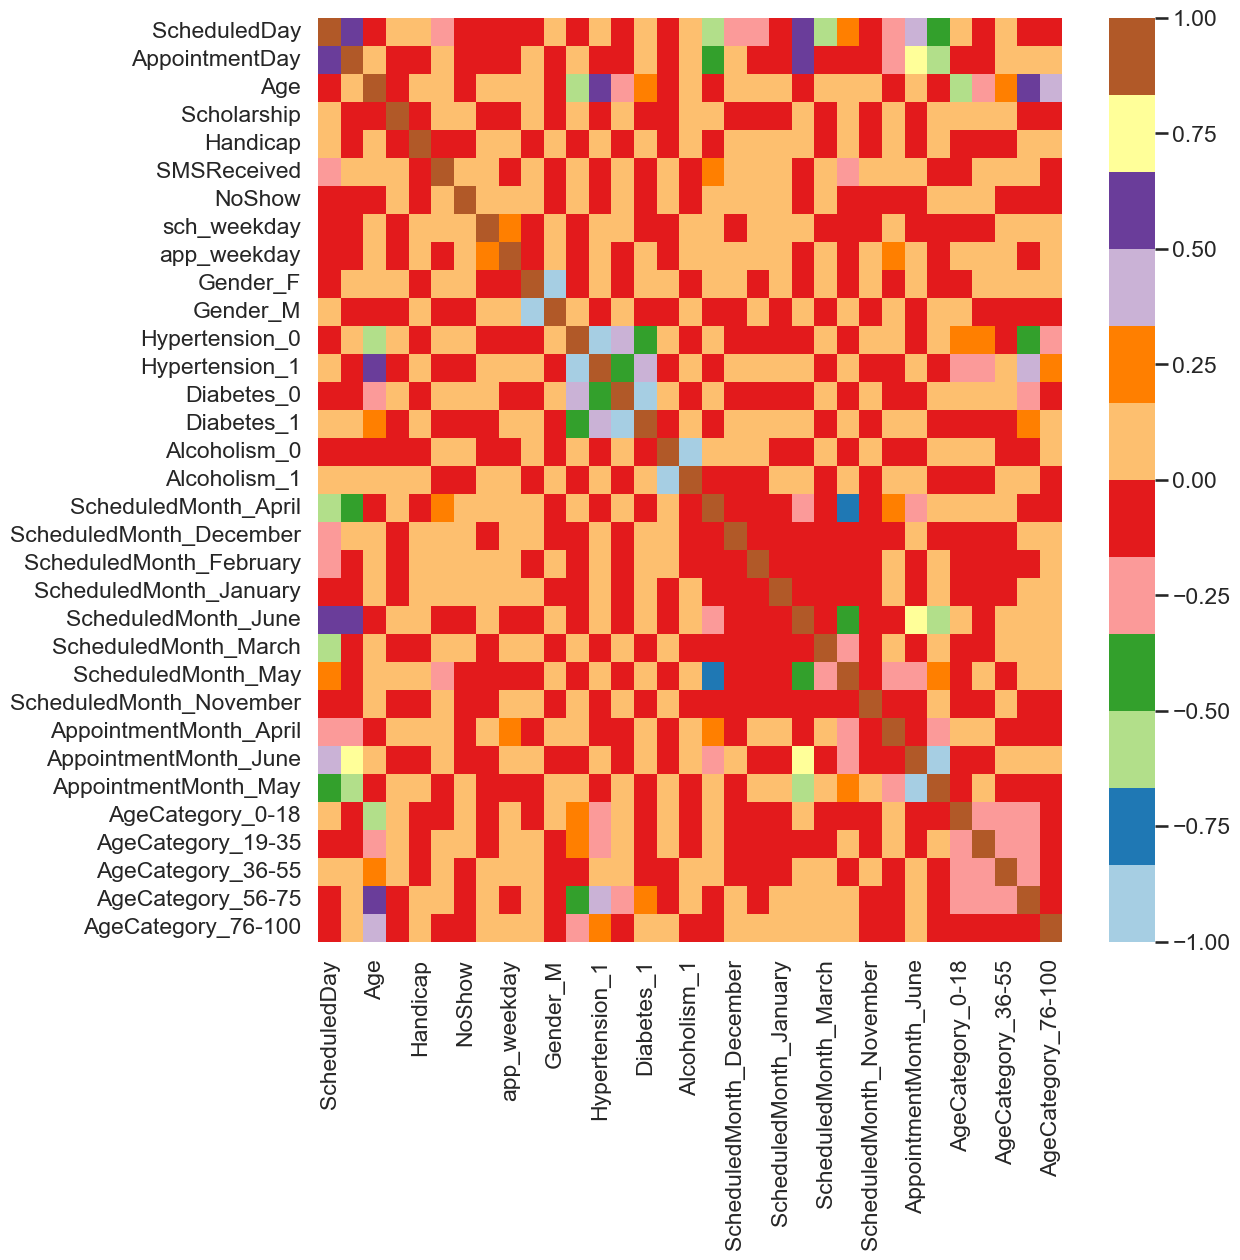

In [1195]:
# Identify columns to drop (all dummy variables for Neighbourhood)
cols_to_drop = [col for col in base_data_dummies.columns if 'Neighbourhood_' in col]


# Drop the identified columns from the DataFrame
base_data_dummies_filtered = base_data_dummies.drop(columns=cols_to_drop)

# Now, base_data_dummies_filtered does not contain the Neighbourhood dummy variables

# Correlation Matrix of entire Dataframe
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies_filtered.corr(), cmap="Paired")

### Temporal Analysis

In [1196]:
primary_data['NoShow'] = primary_data['NoShow'].astype(str)


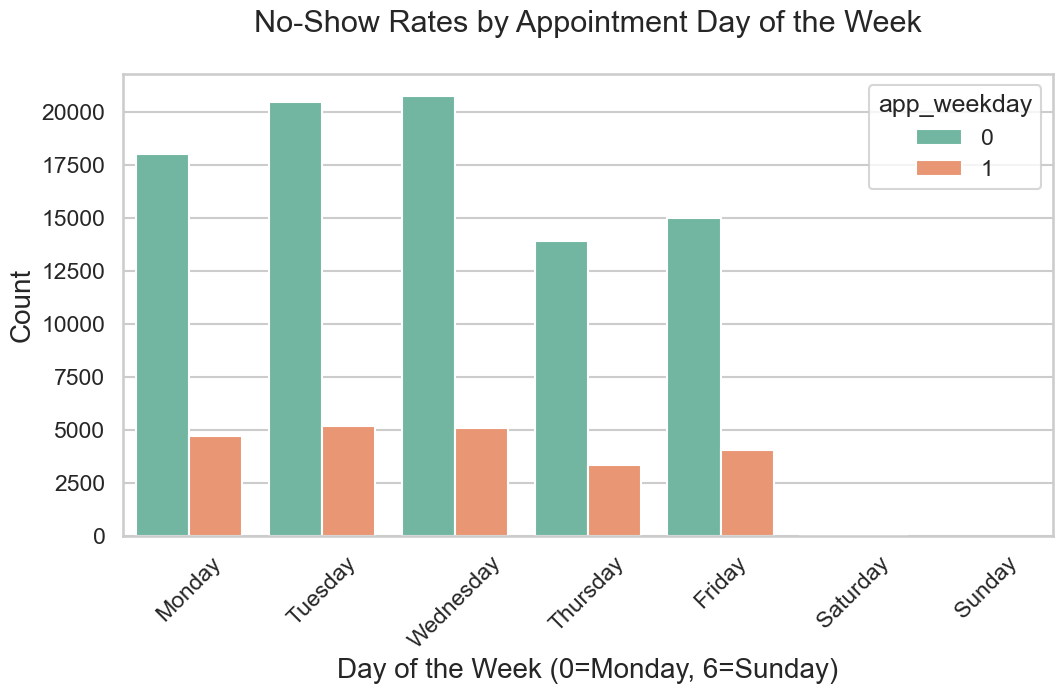

In [1197]:


plt.figure(figsize=(12, 6))
sns.countplot(x='app_weekday', hue='NoShow', data=primary_data, palette='Set2', order=range(7))
plt.title('No-Show Rates by Appointment Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('Count')
plt.legend(title='app_weekday', loc='upper right')
plt.show()

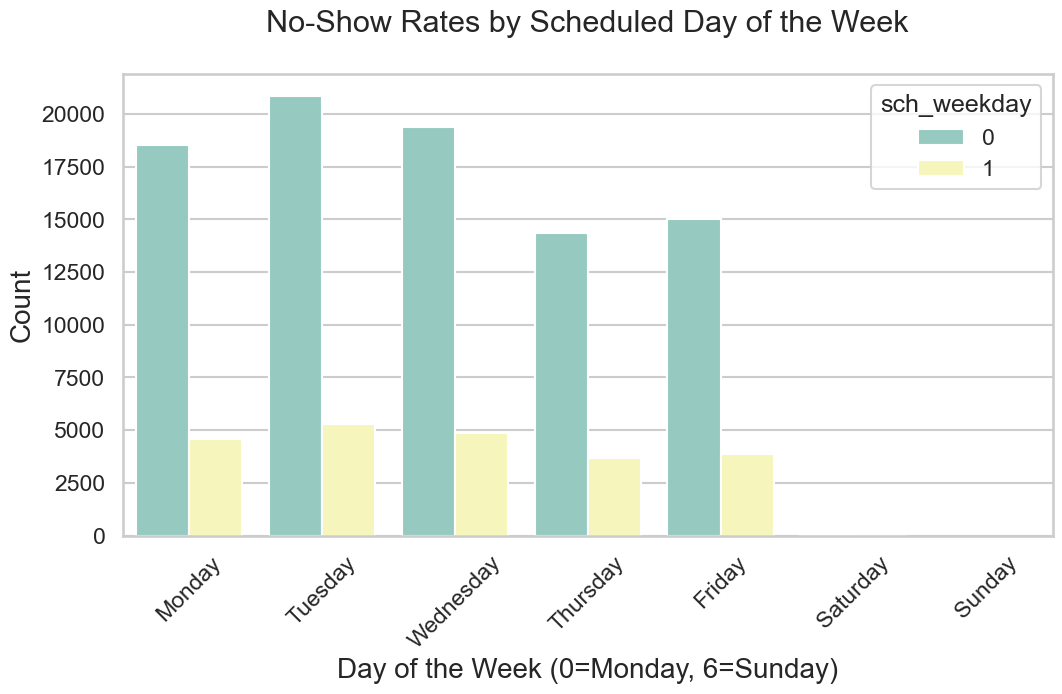

In [1198]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sch_weekday', hue='NoShow', data=primary_data, palette='Set3', order=range(7))
plt.title('No-Show Rates by Scheduled Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('Count')
plt.legend(title='sch_weekday', loc='upper right')
plt.show()


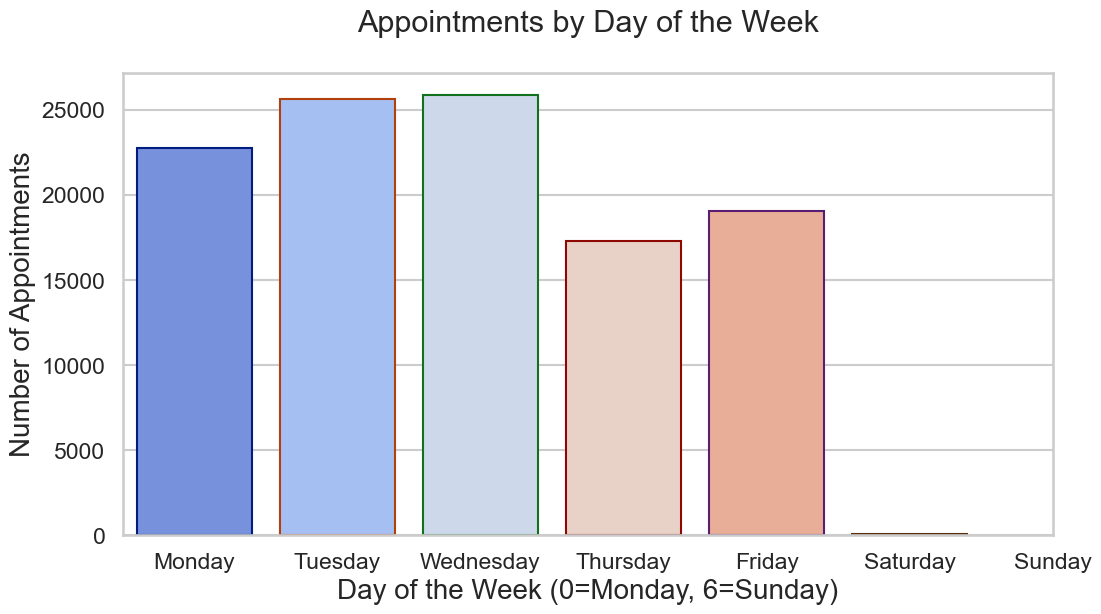

In [1199]:
# Count Plot for Appointment Day of the Week to help find temporal patterns
plt.figure(figsize=(12, 6))
sns.countplot(x='app_weekday', data=primary_data, palette='coolwarm', edgecolor=sns.color_palette('dark', 7))
plt.title('Appointments by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Appointments')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()
# Insight: Aims to highlight any particular days that see a higher or lower volume of appointments.


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


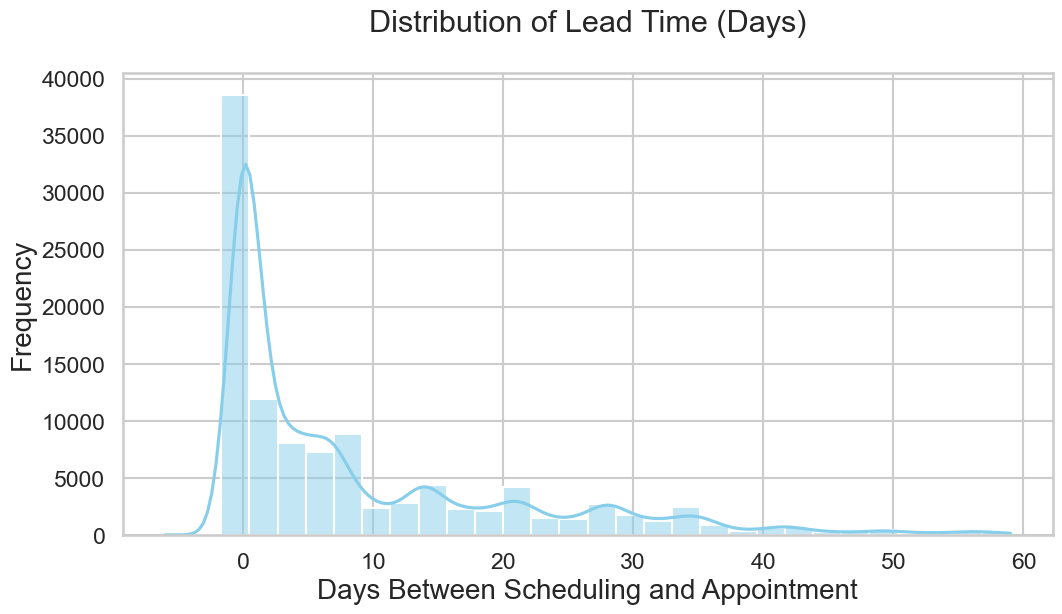

In [1200]:
# Calculating the difference in days between scheduling and appointment
primary_data['LeadTime'] = (primary_data['AppointmentDay'] - primary_data['ScheduledDay']).dt.days

# Distribution of Lead Time
plt.figure(figsize=(12, 6))
sns.histplot(primary_data[primary_data['LeadTime'] < 60]['LeadTime'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Lead Time (Days)')
plt.xlabel('Days Between Scheduling and Appointment')
plt.ylabel('Frequency')
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


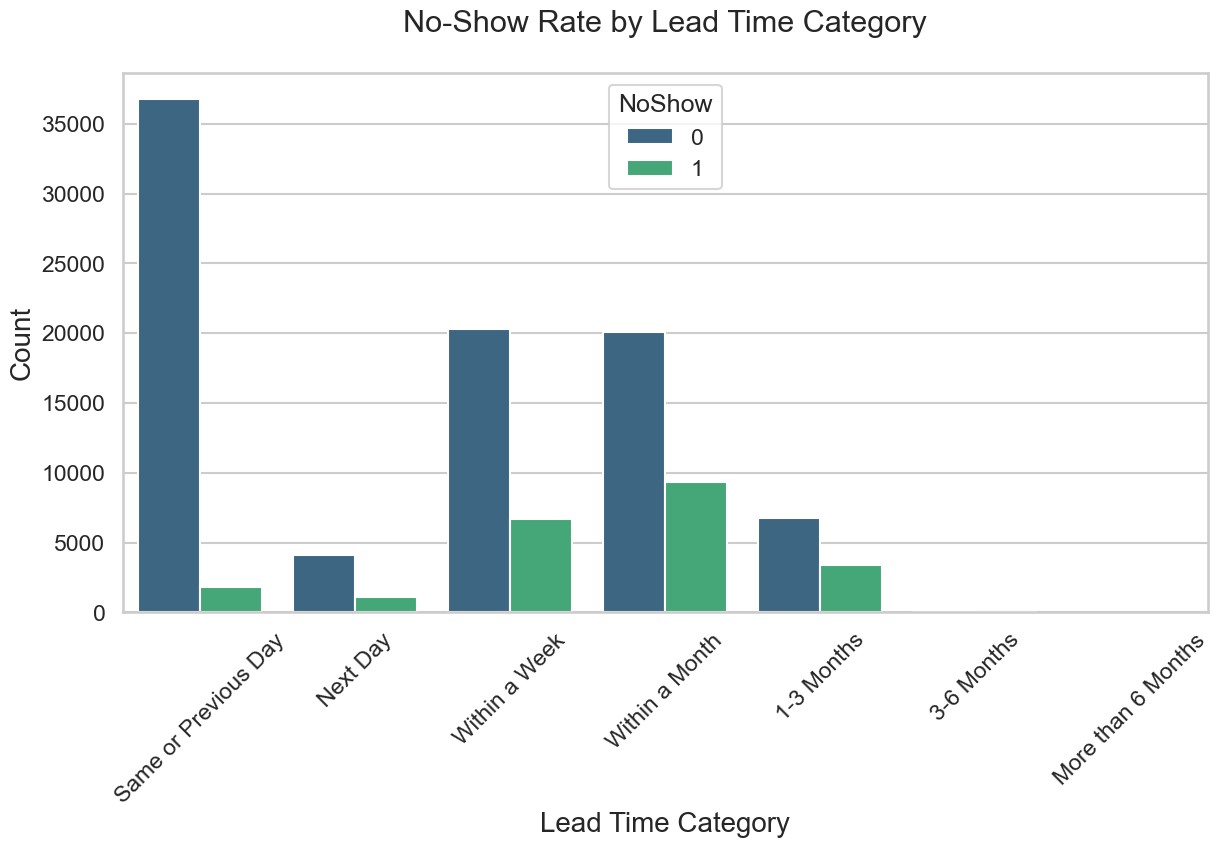

In [1201]:
# Ensure bins cover the entire range of LeadTime, including any negative values
bins = [-np.inf, 0, 1, 7, 30, 90, 180, np.inf]
labels = ['Same or Previous Day', 'Next Day', 'Within a Week', 'Within a Month', '1-3 Months', '3-6 Months', 'More than 6 Months']

# Apply binning
primary_data['LeadTimeCategory'] = pd.cut(primary_data['LeadTime'], bins=bins, labels=labels)

primary_data['NoShow'] = primary_data['NoShow'].astype(str)
# Now, plotting
plt.figure(figsize=(14, 7))
sns.countplot(x='LeadTimeCategory', hue='NoShow', data=primary_data, palette='viridis')
plt.title('No-Show Rate by Lead Time Category')
plt.xlabel('Lead Time Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
